<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Exploration of Anndata object</h1>
<br>

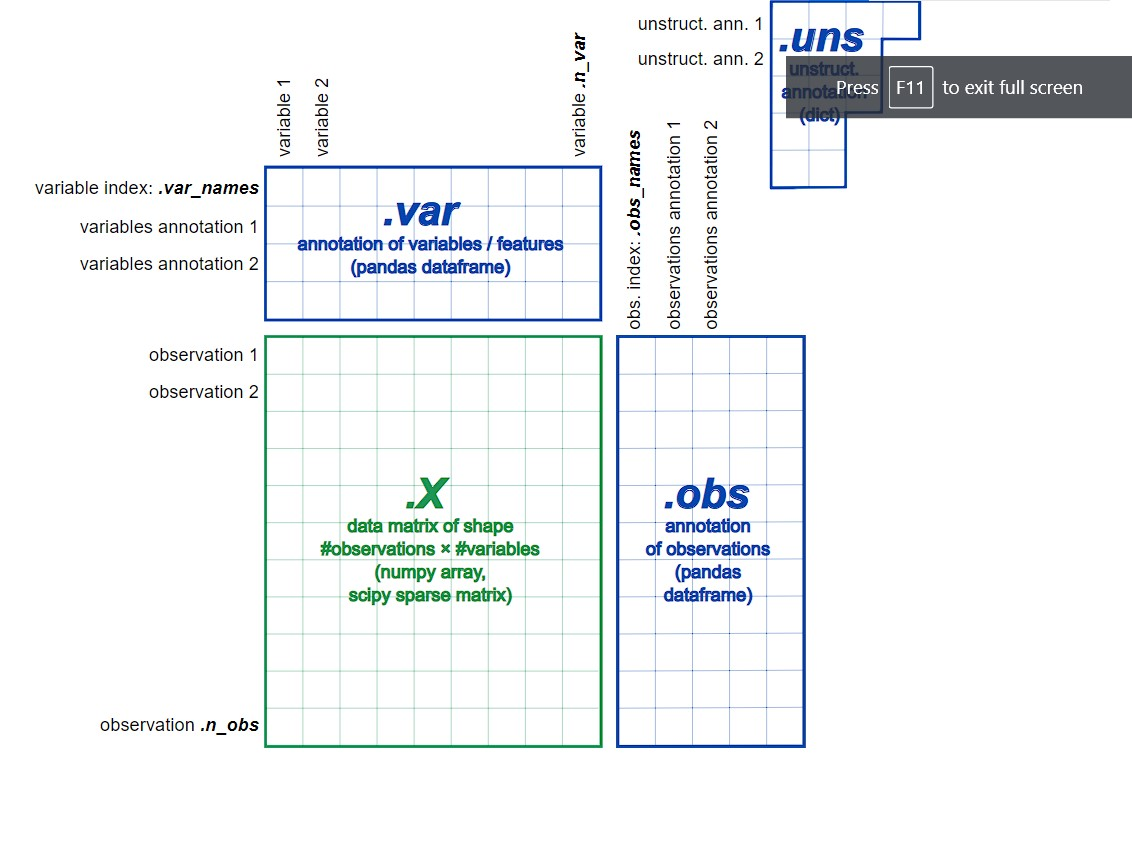

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Introduction - Anndata</h1>

### Anndata : https://anndata.readthedocs.io/en/latest/
AnnData stores observations (samples) of variables/features in the rows of a matrix. 

Single dimensional annotations of the observation and variables are stored in the obs and var attributes as DataFrames. This is intended for metrics calculated over their axes. Multi-dimensional annotations are stored in obsm and varm, which are aligned to the objects observation and variable dimensions respectively. Square matrices representing graphs are stored in obsp and varp, with both of their own dimensions aligned to their associated axis. Additional measurements across both observations and variables are stored in layers.

- Anndata.X - Data matrix of shape n_obs × n_vars - stores the count matrix
- Anndata.obs - One-dimensional annotation of observations (pd.DataFrame). - stores metadata about the observations (cells)
- var - One-dimensional annotation of variables/ features (pd.DataFrame). - stores metadata about the variables (genes)
- uns - unstructured annotation (ordered dictionary). - stores any additional, unstructured information we decide to attach later

### Installations

In [1]:
!pip install -q scanpy

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Exploring a Test Anndata from SCVI</h1>

https://docs.scvi-tools.org/en/stable/api/reference/scvi.data.spleen_lymph_cite_seq.html#scvi.data.spleen_lymph_cite_seq

In [2]:
bdata = sc.read('../input/theory-introto-singlecell-rnaseq-images/test_adata/test_adata.h5ad')


In [3]:
bdata

AnnData object with n_obs × n_vars = 30474 × 13553
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    obsm: 'isotypes_htos', 'protein_expression'

In [8]:
print(bdata.obs.shape)
bdata.obs.head()

(30474, 7)


,batch_indices,n_genes,percent_mito,leiden_subclusters,cell_types,tissue,batch
index,,,,,,,
AAACCCAAGGGTAATT-1,0,3137,0.062138,"12,0",NKT,Spleen,SLN111-D1
AAACCCAAGGTAAACT-1,0,2256,0.057545,6,CD122+ CD8 T,Spleen,SLN111-D1
AAACCCACACTAGGTT-1,0,1367,0.058373,3,Transitional B,Spleen,SLN111-D1
AAACCCACAGATACCT-1,0,1567,0.065386,4,Mature B,Lymph_Node,SLN111-D1
AAACCCACAGGAATAT-1,0,1895,0.059644,0,CD4 T,Lymph_Node,SLN111-D1


Basically, bdata.obs contains the observation across each cell.

In [9]:
print(bdata.var.shape)
bdata.var.head()

(13553, 0)


""
index
Mrpl15
Lypla1
Tcea1
Atp6v1h
Rb1cc1


bdata.var contains information about the genes

In [10]:
bdata.var_names  # print names of all the genes

Index(['Mrpl15', 'Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1', '4732440D04Rik',
       'Pcmtd1', 'Gm26901', 'Rrs1', 'Adhfe1',
       ...
       'Tmlhe', 'AC133103.1', 'AC132444.1', 'Csprs', 'AC132444.6',
       'AC125149.3', 'AC168977.1', 'PISD', 'DHRSX', 'CAAA01147332.1'],
      dtype='object', name='index', length=13553)

In [7]:
bdata.X

<30474x13553 sparse matrix of type '<class 'numpy.float32'>'
	with 43762899 stored elements in Compressed Sparse Row format>

Is the numpy array of Cells X Genes

In [11]:
bdata.obs["new_cell_level_data"] = ["test"] * bdata.n_obs  # adds a new column into obs, similar to pandas

In [12]:
bdata.obs.head()

,batch_indices,n_genes,percent_mito,leiden_subclusters,cell_types,tissue,batch,new_cell_level_data
index,,,,,,,,
AAACCCAAGGGTAATT-1,0,3137,0.062138,"12,0",NKT,Spleen,SLN111-D1,test
AAACCCAAGGTAAACT-1,0,2256,0.057545,6,CD122+ CD8 T,Spleen,SLN111-D1,test
AAACCCACACTAGGTT-1,0,1367,0.058373,3,Transitional B,Spleen,SLN111-D1,test
AAACCCACAGATACCT-1,0,1567,0.065386,4,Mature B,Lymph_Node,SLN111-D1,test
AAACCCACAGGAATAT-1,0,1895,0.059644,0,CD4 T,Lymph_Node,SLN111-D1,test


<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Creating Anndata from the csv files in the dataset</h1>

## Loading the Data
### Brain Counts
Expression matrix where each column corresponds to a gene (or transcript) and each row corresponds to a single cell

In [13]:
# This might take a minute.
count_dataframe = pd.read_csv('../input/singlecell-rnaseq-data-from-mouse-brain/brain_counts.csv',
                              index_col=0)  # use the first column to label the rows (the 'index')

## print the first 2 rows of our dataframe
count_dataframe.head(2)

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The column names represent genes. The row names represent unique cell identifiers that were assigned by the authors of the dataset.

In [14]:
# We can find out how many genes and cells are in the dataset by asking for its shape:
print(count_dataframe.shape)

(3401, 23433)


count_dataframe is cells X genes. There are 3401 cells and 23433 genes.

### Brain Metadata
Metadata describes each cell.

In [15]:
metadata_dataframe = pd.read_csv('../input/singlecell-rnaseq-data-from-mouse-brain/brain_metadata.csv', index_col=0)
print(metadata_dataframe.shape)
metadata_dataframe.head(2)

(3401, 5)


,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728


We have 5 columns of information about 3,401 cells. Sounds reasonable

In [16]:
# We can count the number of times each value appears in a column like this:
print(pd.value_counts(metadata_dataframe['subtissue']))

Cortex         1149
Hippocampus     976
Striatum        723
Cerebellum      553
Name: subtissue, dtype: int64


# Tabular Data
## Constructing AnnData using the two csv files
We now have two dataframes, containing the counts and metadata from the Tabula Muris brain dataset. To keep these organized, we'll use a data structure called <b>AnnData</b>.

In [17]:
adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)
print(adata.shape)

(3401, 23433)


In [18]:
adata.X #expression matrix

array([[  0., 125.,  16., ...,   0.,  54.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 348.,   0., ...,   0., 113.,   0.],
       ...,
       [  0., 135.,  41., ...,   0.,  45.,   0.],
       [  0., 129.,  54., ...,   0.,  57.,   0.],
       [  0.,   1.,   0., ...,   0.,   0.,   0.]], dtype=float32)

<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Preprocessing - Labeling spike-ins</h2>

### Labeling spike-ins
Because this is smartseq2 data, we may have spike-ins. 
An RNA spike-in is an RNA transcript of known sequence and quantity used to calibrate measurements in RNA hybridization assays, such as DNA microarray experiments, RT-qPCR, and RNA-Seq.

A spike-in is designed to bind to a DNA molecule with a matching sequence, known as a control probe. This process of specific binding is called hybridization. A known quantity of RNA spike-in is mixed with the experiment sample during preparation. The degree of hybridization between the spike-ins and the control probes is used to normalize the hybridization measurements of the sample RNA.

- These gene names start with ERCC. We can label them in adata.var as a gene annotation.

In [19]:
is_spike_in = {}
number_of_spike_ins = 0

for gene_name in adata.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True # record that we found a spike-in
        number_of_spike_ins += 1 # bump the counter
    else:
        is_spike_in[gene_name] = False # record that this was not a spike-in
        
adata.var['ERCC'] = pd.Series(is_spike_in) # because the index of adata.var and the keys of is_spike_in match, anndata will take care of matching them up
print('found this many spike ins: ', number_of_spike_ins)

found this many spike ins:  92


We found out all the spike-ins and added True against them in Gene info ie adata.var and False against non-spike-ins.

In [22]:
adata.var.head()

,ERCC
0610005C13Rik,False
0610007C21Rik,False
0610007L01Rik,False
0610007N19Rik,False
0610007P08Rik,False


In [23]:
# We can save the AnnData objectfor later use:
adata.write('brain_raw.h5ad') ## the h5ad extension is AnnData-specific

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_ontology_class' as categorical
/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'subtissue' as categorical
/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories wi

In [24]:
!zip "brain_raw.zip" "./brain_raw.h5ad"

  adding: brain_raw.h5ad (deflated 90%)
